In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
print("Insurance Cost Data Shape:",insurance_df.shape)
print("\nInformation of Insurance Cost:\n")
insurance_df.info()
print("\nStatistical Analysis of Insurance Cost:\n")
insurance_df.describe()

Insurance Cost Data Shape: (1338, 7)

Information of Insurance Cost:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistical Analysis of Insurance Cost:



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_df['charges'].value_counts()

,count
charges,
1639.56310,2
2221.56445,1
19798.05455,1
13063.88300,1
13555.00490,1
...,...
1149.39590,1
37079.37200,1
4738.26820,1


### Dropping Null and Duplicates

In [ ]:
print("NaN values present in Insurance Cost: ",insurance_df.isnull().values.sum())
print("Duplicates present in Insurance Cost: ",insurance_df.duplicated().sum())
insurance_df = insurance_df.drop_duplicates(keep='first')
print("Final Duplicates Count: ",insurance_df.duplicated().sum())

NaN values present in Insurance Cost:  0
Duplicates present in Insurance Cost:  1
Final Duplicates Count:  0


### Plots for Insurance Cost Prediction

Histogram - Target

<Axes: xlabel='charges', ylabel='Count'>

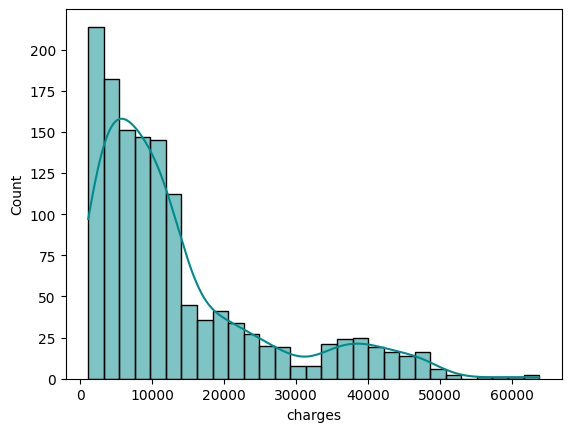

In [ ]:
sns.histplot(insurance_df['charges'], kde=True, color='darkcyan')

Histogram - Bmi

<Axes: xlabel='bmi', ylabel='Count'>

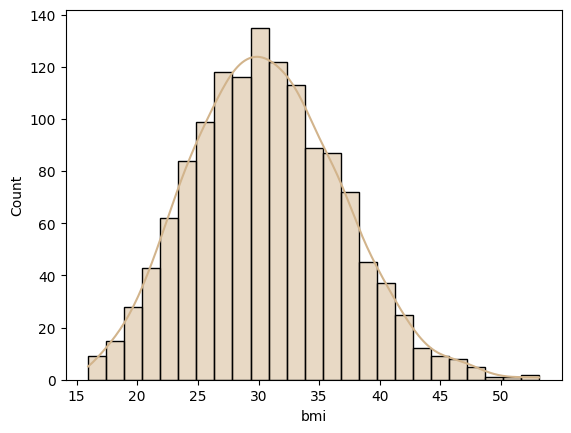

In [ ]:
sns.histplot(insurance_df['bmi'], kde=True, color='tan')

Pie Chart - Region

<Axes: ylabel='count'>

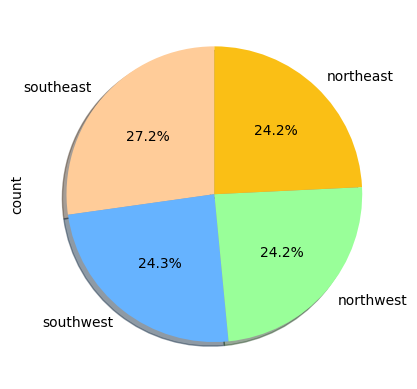

In [ ]:
insurance_df['region'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,shadow=True, colors=['#ffcc99', '#66b3ff', '#99ff99', '#fabf15'])

Pie Chart - Smoker

<Axes: ylabel='count'>

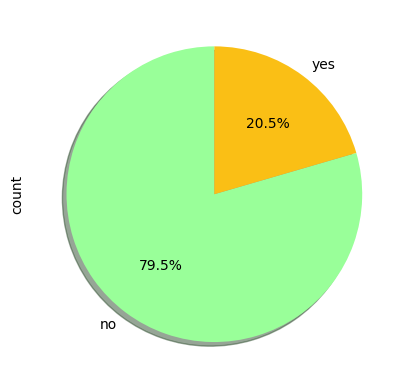

In [ ]:
insurance_df['smoker'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,shadow=True, colors=['#99ff99', '#fabf15'])

In [ ]:
insurance_Q1 = insurance_df['charges'].quantile(0.25)
insurance_Q2 = insurance_df['charges'].median()   # or quantile(0.5)
insurance_Q3 = insurance_df['charges'].quantile(0.75)

print(f"Charges - 25% (Q1): {insurance_Q1}, \nCharges - 50% (Q2): {insurance_Q2}, \nCharges - 75% (Q3): {insurance_Q3}")


Charges - 25% (Q1): 4746.344, 
Charges - 50% (Q2): 9386.1613, 
Charges - 75% (Q3): 16657.71745


In [ ]:
def categorize_charge(charge):
    if charge <= insurance_Q1:
        return 'Low'
    elif charge <= insurance_Q3:
        return 'Medium'
    else:
        return 'High'

insurance_df['charges_category'] = insurance_df['charges'].apply(categorize_charge)
insurance_df

,age,sex,bmi,children,smoker,region,charges,charges_category
0,19,female,27.900,0,yes,southwest,16884.92400,High
1,18,male,33.770,1,no,southeast,1725.55230,Low
2,28,male,33.000,3,no,southeast,4449.46200,Low
3,33,male,22.705,0,no,northwest,21984.47061,High
4,32,male,28.880,0,no,northwest,3866.85520,Low
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Medium
1334,18,female,31.920,0,no,northeast,2205.98080,Low
1335,18,female,36.850,0,no,southeast,1629.83350,Low
1336,21,female,25.800,0,no,southwest,2007.94500,Low


In [ ]:
insurance_df['charges_category'].value_counts()

,count
charges_category,
Medium,668
Low,335
High,334


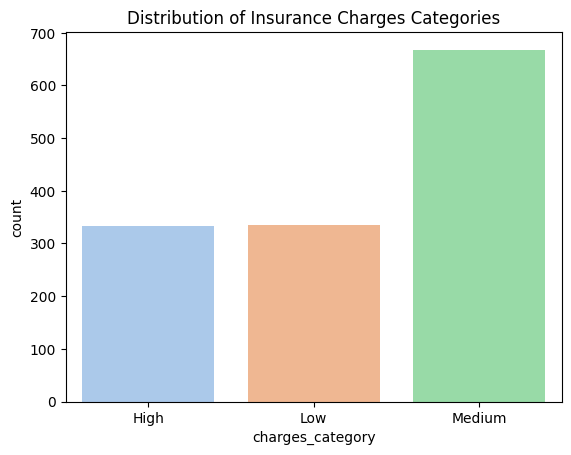

In [ ]:
sns.countplot(data=insurance_df, x='charges_category', palette='pastel')
plt.title('Distribution of Insurance Charges Categories')
plt.show()

In [ ]:
del insurance_df['charges']
insurance_le = LabelEncoder()
insurance_df['charges_category']= insurance_le.fit_transform(insurance_df['charges_category'])
insurance_df['sex']= insurance_le.fit_transform(insurance_df['sex'])
insurance_df['smoker']= insurance_le.fit_transform(insurance_df['smoker'])
insurance_df['region']= insurance_le.fit_transform(insurance_df['region'])
insurance_df

,age,sex,bmi,children,smoker,region,charges_category
0,19,0,27.900,0,1,3,0
1,18,1,33.770,1,0,2,1
2,28,1,33.000,3,0,2,1
3,33,1,22.705,0,0,1,0
4,32,1,28.880,0,0,1,1
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,2
1334,18,0,31.920,0,0,0,1
1335,18,0,36.850,0,0,2,1
1336,21,0,25.800,0,0,3,1


Splitting

In [ ]:
insuranceX = insurance_df.drop('charges_category',axis=1)
insuranceY = insurance_df['charges_category']

ins_Xtr, ins_Xts, ins_Ytr, ins_Yts = train_test_split(insuranceX, insuranceY, test_size=0.4, random_state=20)
ins_Xva, ins_Xts, ins_Yva, ins_Yts = train_test_split(ins_Xts, ins_Yts, test_size=0.5, random_state=20)

In [ ]:
ins_Xtr

,age,sex,bmi,children,smoker,region
683,53,1,24.320,0,0,1
519,31,1,30.875,0,0,0
1245,28,1,24.300,5,0,3
769,38,0,19.475,2,0,1
218,26,0,29.920,1,0,2
...,...,...,...,...,...,...
1243,28,0,33.110,0,0,2
925,50,1,32.110,2,0,0
1248,18,0,39.820,0,0,2
271,50,1,34.200,2,1,3


In [ ]:
ins_Xts

,age,sex,bmi,children,smoker,region
1,18,1,33.770,1,0,2
1013,48,1,32.300,1,0,1
1207,36,1,33.400,2,1,3
773,19,0,28.880,0,1,1
1057,45,0,31.790,0,0,2
...,...,...,...,...,...,...
605,51,0,34.100,0,0,2
1318,35,1,39.710,4,0,0
420,64,1,33.880,0,1,2
1186,20,1,35.625,3,1,1


In [ ]:
ins_Xva

,age,sex,bmi,children,smoker,region
790,39,0,41.800,0,0,2
450,39,1,29.600,4,0,3
313,49,1,35.860,0,0,2
1118,33,1,35.750,1,1,2
813,28,1,22.515,2,0,0
...,...,...,...,...,...,...
244,63,0,27.740,0,1,0
530,57,1,42.130,1,1,2
165,47,1,28.215,4,0,0
1219,38,0,30.210,3,0,1


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Gradient Boosting Classifier

Chosen Parameters by GB Classifier:

{'criterion': 'friedman_mse', 'loss': 'log_loss', 'n_estimators': 30}

==Validation of Gradient Boosting==

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        66
           1       0.85      0.95      0.90        66
           2       0.92      0.95      0.93       135

    accuracy                           0.92       267
   macro avg       0.92      0.91      0.91       267
weighted avg       0.92      0.92      0.92       267



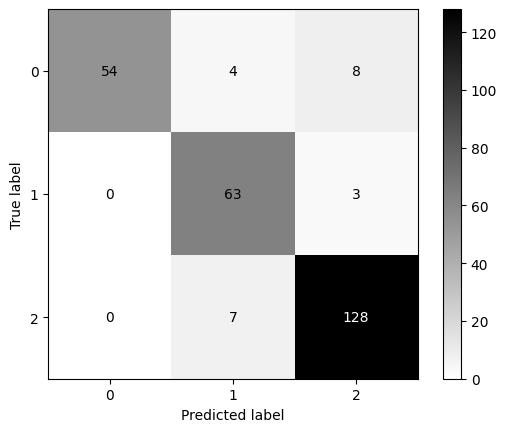


==Testing of Gradient Boosting==

              precision    recall  f1-score   support

           0       0.95      0.64      0.77        64
           1       0.82      0.97      0.89        65
           2       0.89      0.94      0.91       139

    accuracy                           0.88       268
   macro avg       0.89      0.85      0.86       268
weighted avg       0.89      0.88      0.87       268



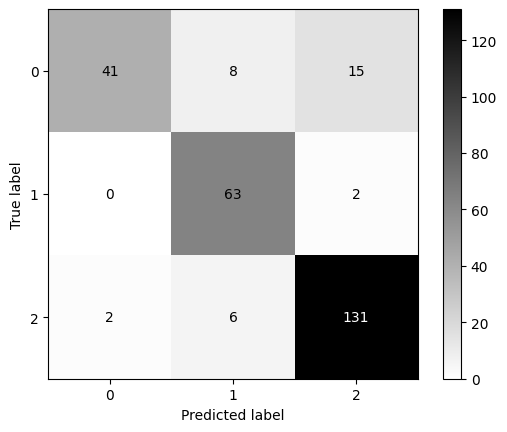

In [ ]:
# train, validation and testing of Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

params_classif = { 'loss':['exponential', 'log_loss'],
                      'n_estimators': [100, 30, 50, 80],
                      'criterion': ['friedman_mse', 'squared_error']
                    }

ins_model = GradientBoostingClassifier()
ins_model = GridSearchCV(ins_model, params_classif, cv=2)
ins_model.fit(ins_Xtr, ins_Ytr)
print("Chosen Parameters by GB Classifier:\n")
print(ins_model.best_params_)

ins_model = ins_model.best_estimator_
ins_model.fit(ins_Xtr, ins_Ytr)

ins_Ypred = ins_model.predict(ins_Xva)
print("\n==Validation of Gradient Boosting==\n")
print(classification_report(ins_Yva, ins_Ypred))
confus_matrix = confusion_matrix(ins_Yva, ins_Ypred)
ConfusionMatrixDisplay(confusion_matrix = confus_matrix, display_labels = [0,1,2]).plot(cmap='binary')
plt.show()

ins_Ypred = ins_model.predict(ins_Xts)
print("\n==Testing of Gradient Boosting==\n")
print(classification_report(ins_Yts, ins_Ypred))
confus_matrix = confusion_matrix(ins_Yts, ins_Ypred)
ConfusionMatrixDisplay(confusion_matrix = confus_matrix, display_labels = [0,1,2]).plot(cmap='binary')
plt.show()

### Decision Tree Classifier

Chosen Parameters by DT Classifier:

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 6}

==Validation of Decision Tree==

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        66
           1       0.85      0.97      0.91        66
           2       0.93      0.94      0.93       135

    accuracy                           0.92       267
   macro avg       0.92      0.91      0.91       267
weighted avg       0.92      0.92      0.92       267



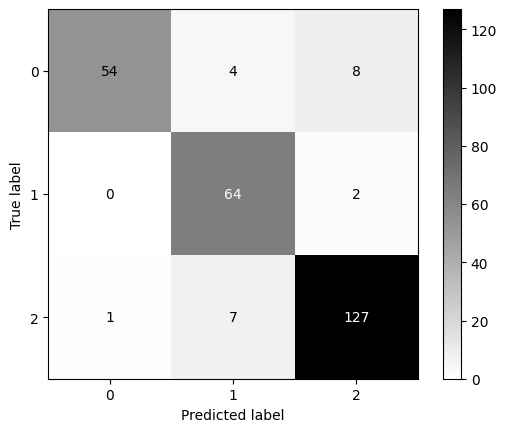


==Testing of Decision Tree==

              precision    recall  f1-score   support

           0       0.98      0.64      0.77        64
           1       0.80      0.98      0.88        65
           2       0.90      0.95      0.93       139

    accuracy                           0.88       268
   macro avg       0.89      0.86      0.86       268
weighted avg       0.90      0.88      0.88       268



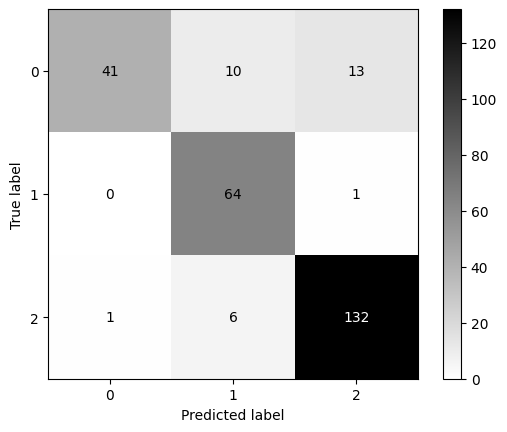

In [ ]:
# train, validation and testing of Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

params_classif = { 'min_samples_split':[1, 2, 5, 6],
                      'max_depth': [10, 3, 5, 8],
                      'criterion': ['gini', 'entropy', 'log_loss']
                    }

ins_model = DecisionTreeClassifier()
ins_model = GridSearchCV(ins_model, params_classif, cv=2)
ins_model.fit(ins_Xtr, ins_Ytr)
print("Chosen Parameters by DT Classifier:\n")
print(ins_model.best_params_)

ins_model = ins_model.best_estimator_
ins_model.fit(ins_Xtr, ins_Ytr)

ins_Ypred = ins_model.predict(ins_Xva)
print("\n==Validation of Decision Tree==\n")
print(classification_report(ins_Yva, ins_Ypred))
confus_matrix = confusion_matrix(ins_Yva, ins_Ypred)
ConfusionMatrixDisplay(confusion_matrix = confus_matrix, display_labels = [0,1,2]).plot(cmap='binary')
plt.show()

ins_Ypred = ins_model.predict(ins_Xts)
print("\n==Testing of Decision Tree==\n")
print(classification_report(ins_Yts, ins_Ypred))
confus_matrix = confusion_matrix(ins_Yts, ins_Ypred)
ConfusionMatrixDisplay(confusion_matrix = confus_matrix, display_labels = [0,1,2]).plot(cmap='binary')
plt.show()